In [63]:
# Імпортувили потрібні бібліотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [64]:
# завантажила датасет
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_17012\3609538875.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [65]:
# перевіриkf типи змінних і кількість данних по кожній змінній
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [66]:
# Вивели перші п'ять  записів
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [67]:
# вивела розмірніть датасету
print(df.shape)

(7461195, 13)


In [68]:
# вивести основну статистичну інформацію по числовим змінним
df.describe()

,Year of event,Event number of finishers,Athlete year of birth,Athlete ID
count,7.461195e+06,7.461195e+06,6.873034e+06,7.461195e+06
mean,2.011983e+03,1.451969e+03,1.969762e+03,5.536261e+05
std,1.000844e+01,3.124784e+03,1.312560e+01,4.801613e+05
min,1.798000e+03,0.000000e+00,1.193000e+03,0.000000e+00
25%,2.010000e+03,8.800000e+01,1.962000e+03,1.357120e+05
50%,2.015000e+03,2.350000e+02,1.971000e+03,3.944680e+05
75%,2.018000e+03,8.670000e+02,1.979000e+03,1.037699e+06
max,2.022000e+03,2.002700e+04,2.021000e+03,1.641167e+06


In [69]:
# визначили кількість пропущених значень по кожному атрибуту
print(df.isnull().sum())

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64


In [70]:
# вибрала тількі потрібні дані
# Потрібні тількі USA гонки, 50km, 50mi , 2018

In [71]:
df2 = df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event']==2018)& (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]

In [72]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59


In [73]:
# вивела розмірніть нового датасету
df2.shape

(64299, 13)

In [74]:
# видолила USA з events names, бо всі наші записи і так з USA
df2['Event name'] = df['Event name'].str.split('(').str.get(0)


C:\Users\user\AppData\Local\Temp\ipykernel_17012\1436791483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df['Event name'].str.split('(').str.get(0)


In [75]:
# розрахувала приблизний вік атлета і записала в нову колонку

df2['Athlete age'] = df2['Year of event']-df2['Athlete year of birth']

C:\Users\user\AppData\Local\Temp\ipykernel_17012\2395590630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete age'] = df2['Year of event']-df2['Athlete year of birth']


In [76]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55,35.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56,41.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57,42.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58,32.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59,30.0


In [77]:
# видалила h з Athlete performance

df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)
df2

C:\Users\user\AppData\Local\Temp\ipykernel_17012\4260367909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05,"*Middleville, MI",USA,1983.0,M,M23,8.141,55,35.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56,41.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57,42.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17,"*Utica, MI",USA,1986.0,M,M23,6.914,58,32.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661478,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,17:05:58,NaN,USA,1972.0,M,M45,4.706,68122,46.0
661479,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,18:13:01,NaN,USA,1953.0,M,M65,4.417,23336,65.0
661480,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,18:49:58,NaN,USA,1986.0,M,M23,4.273,375022,32.0
661481,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,23:30:00,NaN,USA,1952.0,M,M65,3.424,68273,66.0


In [78]:
# вилучити не потрібні колонки Athlete club, Athlete country, Athlete year of birth, Athlete age category

df2 =df2.drop(['Athlete club','Athlete country','Athlete year of birth', 'Athlete age category'], axis =1)
df2

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05,M,8.141,55,35.0
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35,F,7.211,56,41.0
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00,M,6.967,57,42.0
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17,M,6.914,58,32.0
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35,M,6.738,59,30.0
...,...,...,...,...,...,...,...,...,...,...
661478,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,17:05:58,M,4.706,68122,46.0
661479,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,18:13:01,M,4.417,23336,65.0
661480,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,18:49:58,M,4.273,375022,32.0
661481,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,23:30:00,M,3.424,68273,66.0


In [79]:
# вилучення null значеннь
df2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Athlete age                  575
dtype: int64

In [80]:
df2 = df2.dropna(subset=['Athlete age'])
df2.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Athlete age                  0
dtype: int64

In [81]:
# видалити невизначений гендер
(df2['Athlete gender']=='X').sum()
df2=df2.loc[df2['Athlete gender'] != 'X']

In [82]:
# видалила дублікати
df2 = df2.drop_duplicates()
df2.shape

(63721, 10)

In [83]:
# скинути індекс

df2.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05,M,8.141,55,35.0
1,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35,F,7.211,56,41.0
2,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00,M,6.967,57,42.0
3,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17,M,6.914,58,32.0
4,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35,M,6.738,59,30.0
...,...,...,...,...,...,...,...,...,...,...
63716,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,17:05:58,M,4.706,68122,46.0
63717,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,18:13:01,M,4.417,23336,65.0
63718,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,18:49:58,M,4.273,375022,32.0
63719,2018,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,23:30:00,M,3.424,68273,66.0


In [84]:
# виправити типи
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete age                  float64
dtype: object

In [85]:
df2['Athlete age']=df2['Athlete age'].astype(int)

In [86]:
df2['Athlete average speed']=df2['Athlete average speed'].astype(float)
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Athlete age                    int32
dtype: object

In [87]:
# перейменувала колонки

df2=df2.rename(columns={'Year of event':'year',
                        'Event dates':'race_days',
                        'Event name':'race_name',
                        'Event distance/length':'race_length',
                        'Event number of finishers':'race_n_of_finishers',
                        'Athlete performance':'athlete_performance',
                        'Athlete gender':'athlete_gender',
                        'Athlete average speed':'athlete_average_speed',
                        'Athlete ID':'athlete_id',
                        'Athlete age': 'athlete_age'
})
df2.head()

,year,race_days,race_name,race_length,race_n_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,9:53:05,M,8.141,55,35
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:09:35,F,7.211,56,41
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:33:00,M,6.967,57,42
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:38:17,M,6.914,58,32
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,11:56:35,M,6.738,59,30


In [88]:
# змінила порядок колонок

df3= df2[['race_days','race_name', 'race_length', 'race_n_of_finishers','athlete_id', 'athlete_gender','athlete_age','athlete_average_speed', 'athlete_performance']]
df3

,race_days,race_name,race_length,race_n_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_average_speed,athlete_performance
55,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,55,M,35,8.141,9:53:05
56,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,56,F,41,7.211,11:09:35
57,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,57,M,42,6.967,11:33:00
58,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,58,M,32,6.914,11:38:17
59,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,59,M,30,6.738,11:56:35
...,...,...,...,...,...,...,...,...,...
661478,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,68122,M,46,4.706,17:05:58
661479,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,23336,M,65,4.417,18:13:01
661480,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,375022,M,32,4.273,18:49:58
661481,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,68273,M,66,3.424,23:30:00


<Axes: xlabel='race_length', ylabel='Count'>

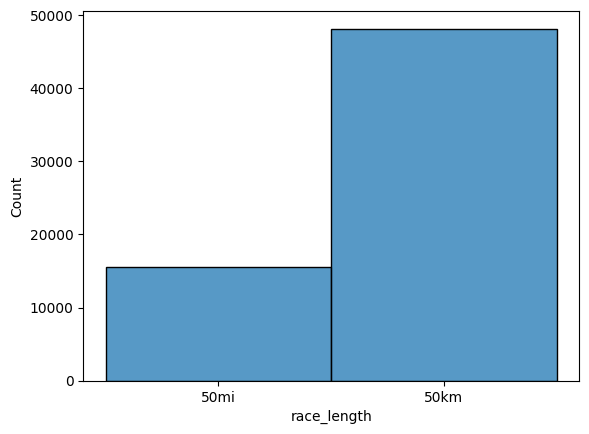

In [89]:
# Побудувала співвідношення довжини гонки
sns.histplot(df3['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

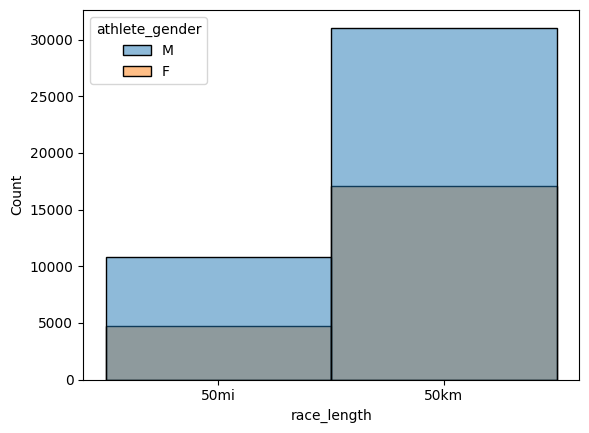

In [90]:
# порівняння скільки жінок і чоловіків пробігли гонки різних довжин
sns.histplot(df3, x ='race_length', hue = 'athlete_gender')

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


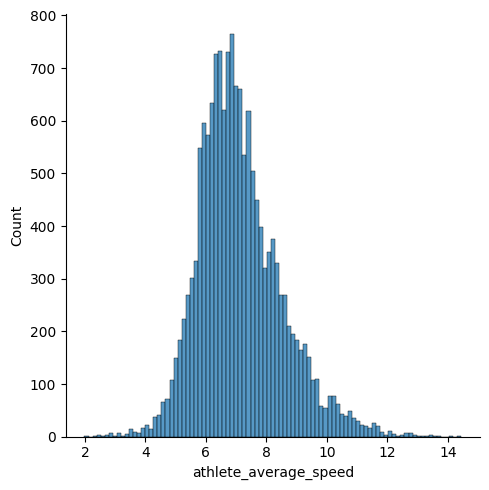

In [91]:
# візуалізувала графік середньї швидкості атлета на гонці 50 миль
sns.displot(df3[df3['race_length']=='50mi']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

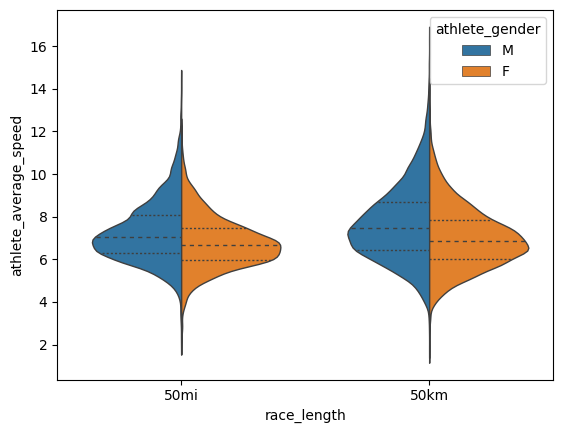

In [92]:
# порівняла графік середньї швидкості жінок і чоловіків
sns.violinplot(df3, x='race_length', y = 'athlete_average_speed', hue= 'athlete_gender', split = True, inner= 'quart',linewidth=1)

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


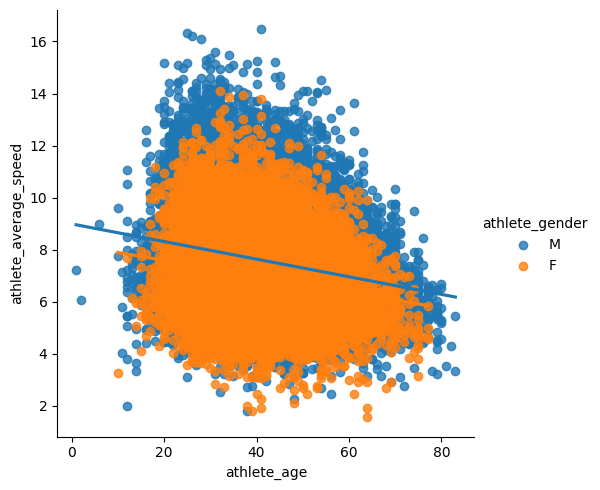

In [93]:
# графік залежності віку атлета і середньої швидкості чоловіків і жінок
sns.lmplot(data=df3, x = 'athlete_age', y= 'athlete_average_speed', hue='athlete_gender')

C:\Users\user\AppData\Local\Temp\ipykernel_17012\864128206.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df3.select_dtypes(include=['float64', 'int64', 'int32']).hist(ax = plt.gca())


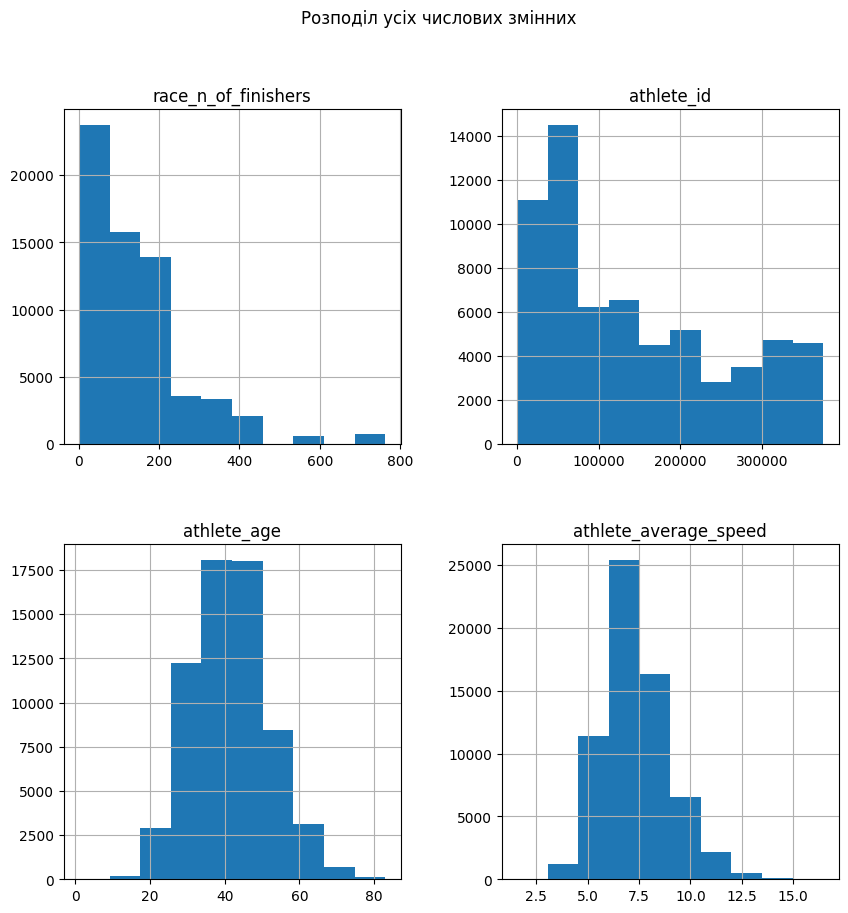

In [94]:
# побудувала діаграми розподілу всіх числових змінних
plt.figure(figsize = (10, 10))
df3.select_dtypes(include=['float64', 'int64', 'int32']).hist(ax = plt.gca())
plt.gcf().suptitle("Розподіл усіх числових змінних")
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


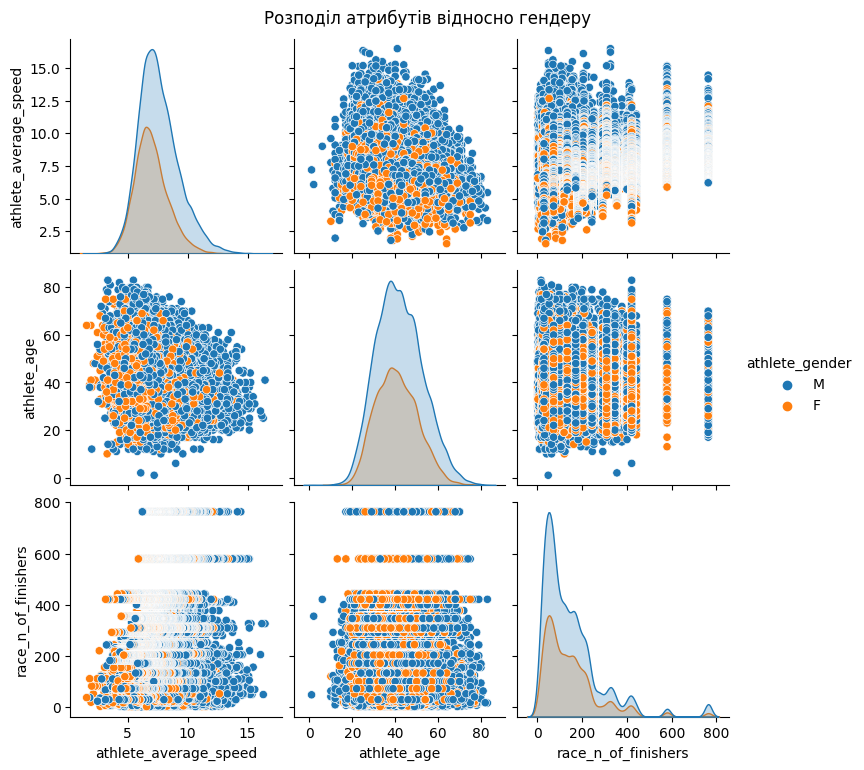

In [95]:


sns.pairplot(df3[['athlete_average_speed','athlete_age','race_n_of_finishers', 'athlete_gender']], hue='athlete_gender')
plt.gcf().suptitle('Розподіл атрибутів відносно гендеру', y=1.02)
plt.show()

In [96]:
# questions to find out

# race_days
# race_name
# race_length
# race_n_of_finishers
# athlete_id
# athlete_gender
# athlete_age
# athlete_average_speed
# athlete_performance


In [97]:
# Дізналась різницю в швидкості між чоловіками і жінками

df3.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.009615
             M                 7.671578
50mi         F                 6.779836
             M                 7.275691
Name: athlete_average_speed, dtype: float64

In [98]:
# яка вікова група найкраща в гонці на 50 миль
df3.query('race_length=="50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=False).query('count>19')[:15]

,mean,count
athlete_age,,
23,7.888161,118
27,7.686616,284
28,7.674163,306
20,7.617000,50
22,7.605280,118
25,7.591766,158
32,7.558242,487
33,7.505215,479
21,7.502487,78


In [99]:
# яка вікова група найгірша в гонці на 50 миль
df3.query('race_length=="50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=True).query('count>19')[:15]

,mean,count
athlete_age,,
69,5.493520,25
67,5.830107,28
68,6.075846,26
63,6.257200,70
66,6.275825,40
61,6.369542,120
64,6.385163,86
60,6.472886,132
65,6.512070,43


In [100]:
# Дізнатись в який сезон атлети бігають найгірше  
# виокремлюємо з дати забігу місяць
df3['race_month'] = df3['race_days'].str.split('.').str.get(-2).astype(int)

In [101]:
df3

,race_days,race_name,race_length,race_n_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_average_speed,athlete_performance,race_month
55,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,55,M,35,8.141,9:53:05,1
56,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,56,F,41,7.211,11:09:35,1
57,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,57,M,42,6.967,11:33:00,1
58,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,58,M,32,6.914,11:38:17,1
59,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,59,M,30,6.738,11:56:35,1
...,...,...,...,...,...,...,...,...,...,...
661478,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,68122,M,46,4.706,17:05:58,10
661479,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,23336,M,65,4.417,18:13:01,10
661480,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,375022,M,32,4.273,18:49:58,10
661481,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,68273,M,66,3.424,23:30:00,10


In [102]:
# робимо ще одну колонку куди записуємо сизон гонки
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if  x > 11 else 'Fall' if x>8 else 'Summer' if x> 5  else 'Spring' if x>2  else 'Winter')

In [103]:
df3

,race_days,race_name,race_length,race_n_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_average_speed,athlete_performance,race_month,race_season
55,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,55,M,35,8.141,9:53:05,1,Winter
56,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,56,F,41,7.211,11:09:35,1,Winter
57,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,57,M,42,6.967,11:33:00,1,Winter
58,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,58,M,32,6.914,11:38:17,1,Winter
59,06.01.2018,Yankee Springs 50 Mile Winter Challenge,50mi,9,59,M,30,6.738,11:56:35,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...
661478,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,68122,M,46,4.706,17:05:58,10,Fall
661479,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,23336,M,65,4.417,18:13:01,10,Fall
661480,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,375022,M,32,4.273,18:49:58,10,Fall
661481,27.-28.10.2018,Cactus Rose 50 Mile,50mi,29,68273,M,66,3.424,23:30:00,10,Fall


In [104]:
df3.groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Winter,7.650047,10844
Spring,7.464448,20889
Fall,7.297911,18502
Summer,7.052427,13486


In [105]:
# тільки гонка в 50 миль

df3.query('race_length=="50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Fall,7.326713,4540
Spring,7.247640,5187
Winter,7.024640,1582
Summer,6.796457,4244


# Висновки


   На даній лабораторній роботі, я ознайомилась з новим методом роботи на мові Python та закріпили попередньо набуті навички. Використовуючи Jupyter Notebook, який надає можливість створювати блоки коду та Markdown водночас, самостійно навчилась користуватись засобом для роботи з науковими обчисленнями - Pandas - для обробки та аналізу даних та Matplotlib, Seaborn для графічного відображення даних. 
   
   Мету візуалізації було порівняти значення жінок і чоловіків на гонках. Я проаналізувала відткриті дані з ultra-marathon dataset з ресерсу kaggle та визначили який гендер більше приймав участь у гонці, дізнались що в середньому учоловіків середня швидкість більше, дізнались яка вікова групи швидше. Дізнились що в середньому найлегше бігати взимку, а найважче влітку, але на більшій дистанції легше осінню, але найважче все одно влітку.